# Computer Vision and CNN

## Demo 1: Extracting RGB Color Values From An Image

In [4]:
# Importing libraries
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
import matplotlib.pyplot as plt

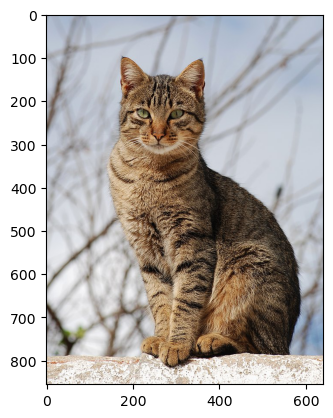

In [5]:
# Loading the image
im = load_img('./ressources/cat-image.jpg' )
# Plotting/Showing the loaded image
plt.imshow(im)

In [6]:
# Converting image to a 3D array
imRGB = img_to_array(im)
# Shape of the image
img_to_array(im).shape

(855, 640, 3)

In [7]:
imRGB

array([[[153., 159., 171.],
        [154., 160., 172.],
        [156., 162., 176.],
        ...,
        [180., 192., 208.],
        [180., 192., 208.],
        [179., 191., 207.]],

       [[153., 159., 171.],
        [155., 161., 173.],
        [157., 163., 177.],
        ...,
        [180., 192., 208.],
        [180., 192., 208.],
        [179., 191., 207.]],

       [[153., 159., 171.],
        [155., 161., 173.],
        [157., 163., 177.],
        ...,
        [180., 192., 208.],
        [180., 192., 208.],
        [179., 191., 207.]],

       ...,

       [[184., 170., 161.],
        [195., 183., 169.],
        [179., 168., 150.],
        ...,
        [255., 251., 250.],
        [241., 237., 236.],
        [232., 228., 227.]],

       [[202., 185., 177.],
        [180., 166., 153.],
        [170., 159., 141.],
        ...,
        [244., 243., 241.],
        [228., 227., 225.],
        [250., 249., 247.]],

       [[181., 164., 156.],
        [161., 145., 132.],
        [214., 2

In [8]:
# Creating three different images, for R(Red), G(Green), and B(Blue)
imR, imG, imB = imRGB.copy(), imRGB.copy(), imRGB.copy()
imR[:,:,[1,2]]=0.
imG[:,:,[0,2]]=0.
imB[:,:,[0,1]]=0.

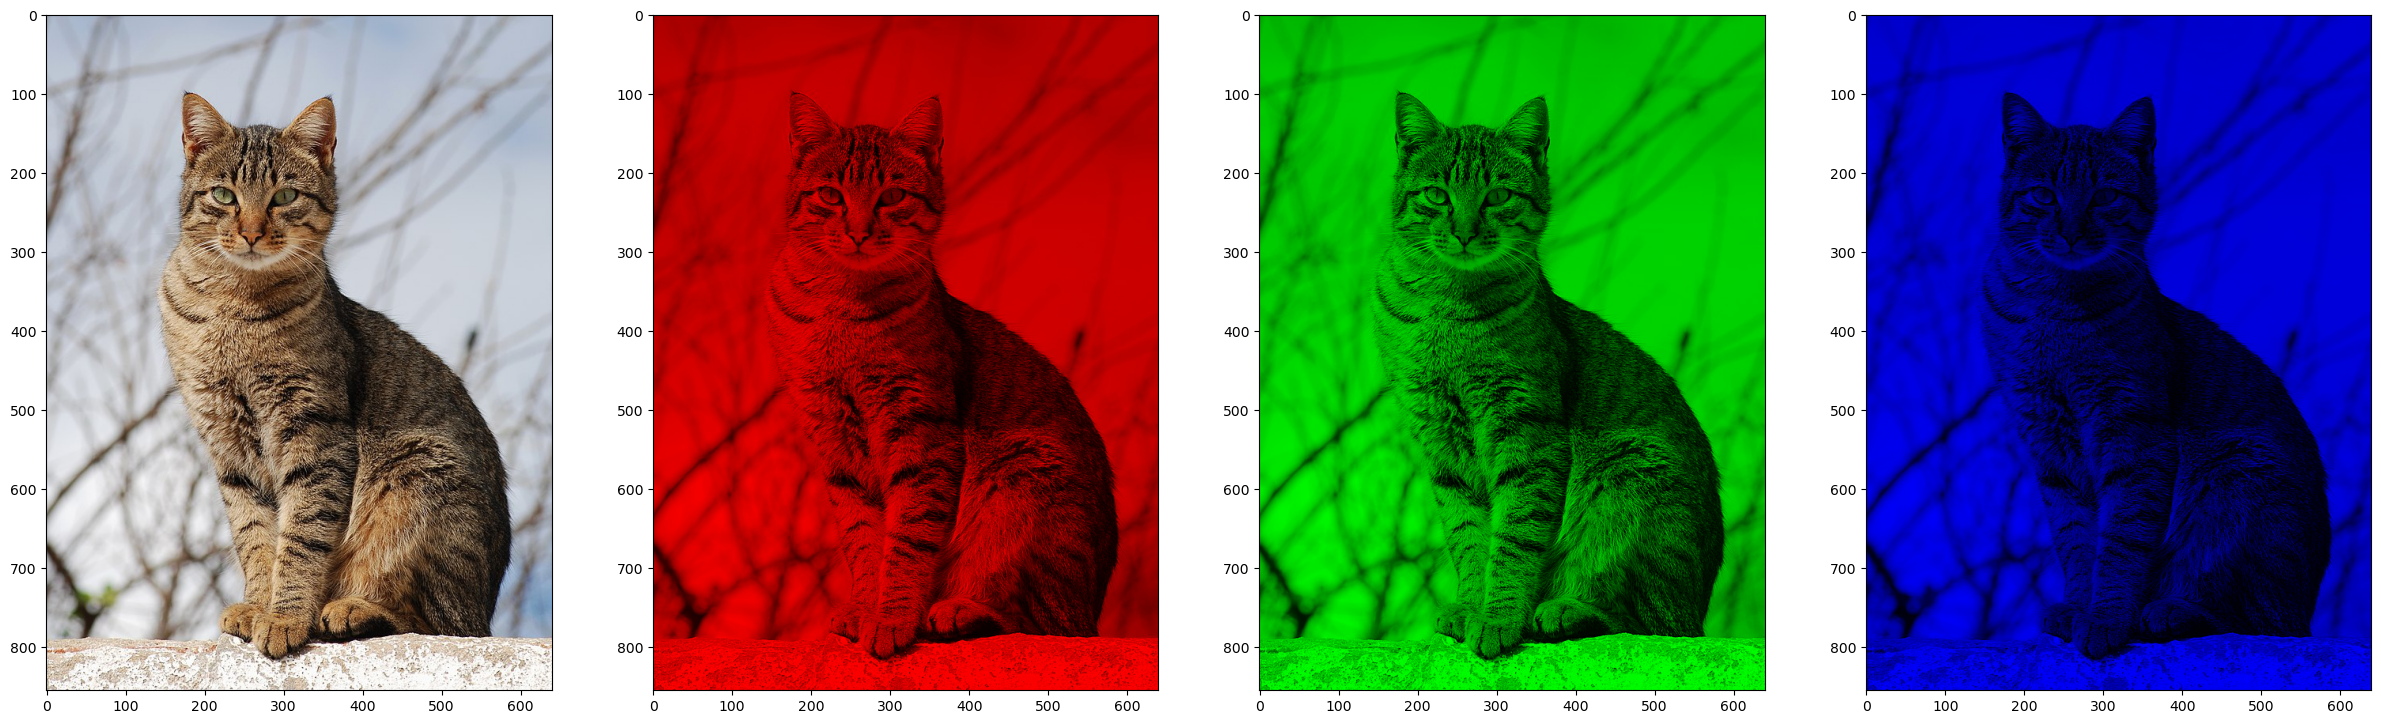

In [9]:
# Plotting/Showing the figures
plt.figure(figsize=(30,20))
plt.subplot(1,4,1)
plt.imshow(im)
plt.subplot(1,4,2)
plt.imshow(array_to_img(imR))
plt.subplot(1,4,3)
plt.imshow(array_to_img(imG))
plt.subplot(1,4,4)
plt.imshow(array_to_img(imB))

## Demo 2: Permuted MNIST

A neural network learned on permuted MNIST can also predict with a good score the permuted MNIST images and this shows that the MLP does not give importance to the local structure

In [10]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

In [14]:
# Loading the training and test sets from MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
rng = np.random.RandomState()

In [13]:
perm = rng.permutation(784)

In [17]:
X_train_perm = X_train.reshape(60000, 784)[:,perm].reshape(60000, 28, 28)
X_test_perm = X_test.reshape(10000, 784)[:,perm].reshape(10000, 28, 28)

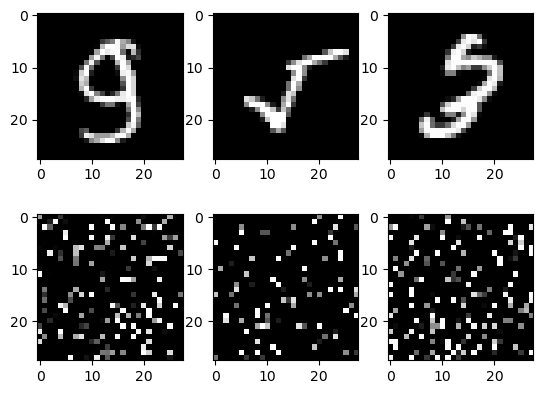

In [18]:
randindices = np.random.randint(X_train.shape[0],size=3)
plt.figure()
plt.subplot(2,3,1)
plt.imshow(X_train[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(X_train[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(X_train[randindices[2],:,:], cmap='gray')
#######
plt.subplot(2,3,4)
plt.imshow(X_train_perm[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,5)
plt.imshow(X_train_perm[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,6)
plt.imshow(X_train_perm[randindices[2],:,:], cmap='gray')

In [19]:
X_train_perm = X_train_perm.reshape(60000, 784)
X_test_perm = X_test_perm.reshape(10000, 784)
X_train_perm = X_train_perm.astype('float32')
X_test_perm = X_test_perm.astype('float32')
print(X_train_perm.shape[0], 'train samples')
print(X_test_perm.shape[0], 'test samples')

60000 train samples
10000 test samples


In [20]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [23]:
batch_size = 128
epochs = 20

In [24]:
X_train_perm.shape

(60000, 784)

In [25]:
history = model.fit(X_train_perm, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data=(X_test_perm, y_test))

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 3.0067 - accuracy: 0.8711 - val_loss: 0.3604 - val_accuracy: 0.9424
Epoch 2/20
469/469 [==============================] - 5s 12ms/step - loss: 0.5140 - accuracy: 0.9214 - val_loss: 0.2127 - val_accuracy: 0.9576
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2825 - accuracy: 0.9394 - val_loss: 0.1567 - val_accuracy: 0.9584
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2039 - accuracy: 0.9507 - val_loss: 0.1374 - val_accuracy: 0.9646
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1687 - accuracy: 0.9566 - val_loss: 0.1352 - val_accuracy: 0.9646
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1504 - accuracy: 0.9602 - val_loss: 0.1447 - val_accuracy: 0.9616
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1467 - accuracy: 0.9622 - val_loss: 0.1192 - val_accuracy: 0.9693


In [26]:
score = model.evaluate(X_test_perm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13753466308116913
Test accuracy: 0.972000002861023


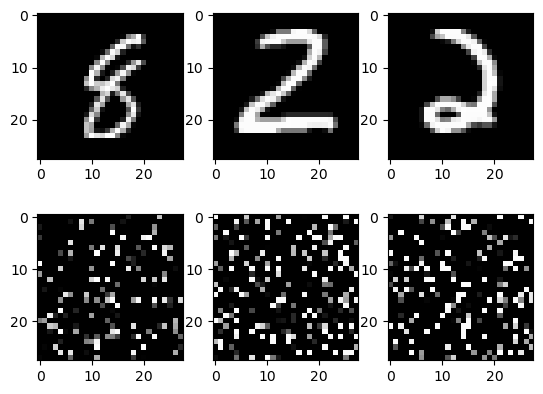

In [56]:
randindices = np.random.randint(X_test.shape[0],size=3)
plt.figure()
plt.subplot(2,3,1)
plt.imshow(X_test[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(X_test[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(X_test[randindices[2],:,:], cmap='gray')
#######
plt.subplot(2,3,4)
plt.imshow(np.reshape(X_test_perm[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(2,3,5)
plt.imshow(np.reshape(X_test_perm[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(2,3,6)
plt.imshow(np.reshape(X_test_perm[randindices[2],:],(28,28)), cmap='gray')

In [57]:
predictions = model.predict(X_test_perm)
print("The NN predicts the number "+ str(np.argmax(predictions[randindices[0],:])) + ' with a confidence of ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("The NN predicts the number "+ str(np.argmax(predictions[randindices[1],:])) + ' with a confidence of ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("The NN predicts the number "+ str(np.argmax(predictions[randindices[2],:])) + ' with a confidence of ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

313/313 [==============================] - 1s 2ms/step
The NN predicts the number 8 with a confidence of 99.9800980091095%.
The NN predicts the number 2 with a confidence of 100.0%.
The NN predicts the number 2 with a confidence of 99.99998807907104%.


## Demo 3: Convolutional Neural Network

A neural network with depth( distance form source to sink more than 2 is called deep neural network)

<b>Example: Convolutional Neural Networks</b> Like other types of neural networks, CNNs consume numerical data.

Therefore, the images fed to these networks must be converted to a numerical representation. Since images are made up of pixels, they are converted into a numerical form that is passed to the CNN.

However, as we will discuss in the upcoming section, how different layers work. Figure below shows a CNN architecture.

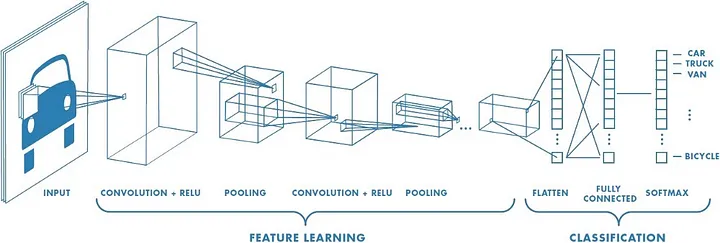

To understand how this works, let’s look at some of the steps involved in training a CNN.

<b>Convolution Layer</b>

Reducing the size of the numerical representation sent to the CNN is done via the convolution operation. This process is vital so that only features that are important in classifying an image are sent to the neural network. Apart from improving the accuracy of the network, this also ensures that minimal compute resources are used in training the network.

The result of the convolution operation is referred to as a feature map, convolved feature, or activation map. Applying a feature detector is what leads to a feature map. The feature detector is also known by other names such as kernel or filter.

The kernel is usually a 3 by 3 matrix. Performing an element-wise multiplication of the kernel with the input image and summing the values, outputs the feature map. This is done by sliding the kernel on the input image. The sliding happens in steps known as strides. The strides and the size of the kernel can be set manually when creating the CNN.

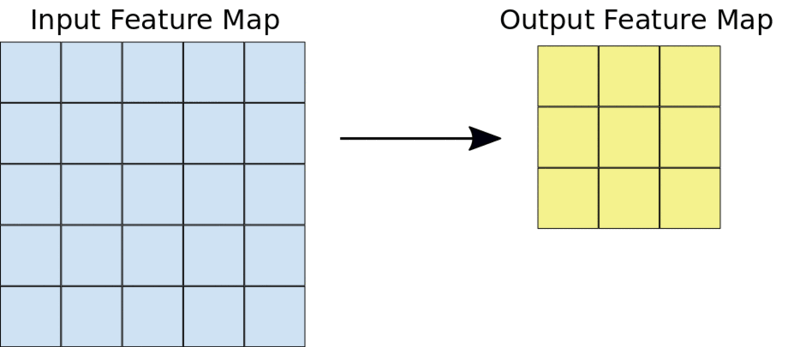

<b>Pooling Layer</b>

In this operation, the size of the feature map is reduced further. There are various pooling methods. A common technique is max-pooling. The size of the pooling filter is usually a 2 by 2 matrix. In max-pooling, the 2 by 2 filter slides over the feature map and picks the largest value in a given box. This operation results in a pooled feature map

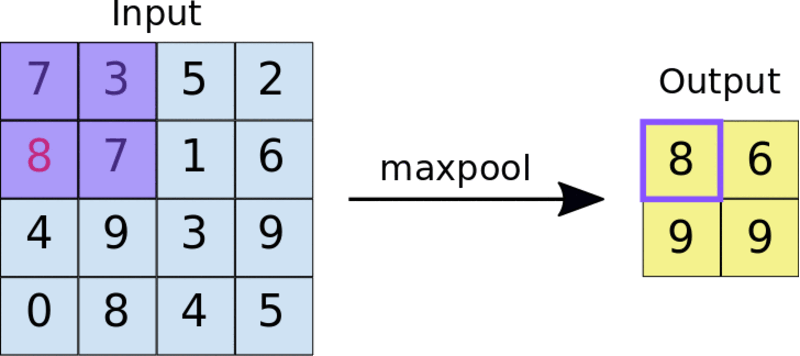

8


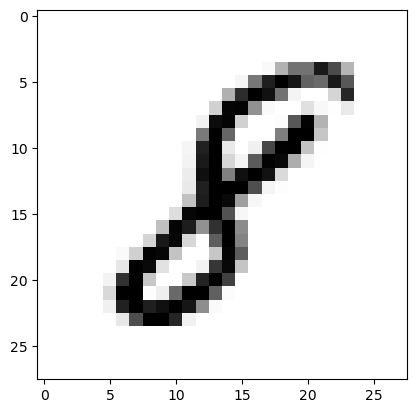

In [58]:
import tensorflow as tf
# import train and test mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

# When we run the code above, we will get the greyscale visualization of the RGB codes as shown below.

In [59]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [60]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [61]:
# have a look at the summary of model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               605824    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [62]:
#compile and train the model

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1980 - accuracy: 0.9404
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0801 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0572 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0426 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0332 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0274 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0247 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0199 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0176 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [63]:
#evaluate the model using the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9851


[0.06044166162610054, 0.9850999712944031]

We achieved 98.5% accuracy with such a basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. We can also make individual predictions with the following code:

1/1 [==============================] - 0s 59ms/step
9


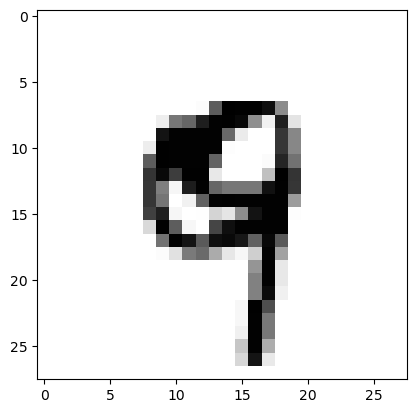

In [64]:
image_index = 4444  
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')   #select the image at given index and show
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1)) # adding batch_size and predicting results
print(pred.argmax())

### TO-DO Exercise:

<li>Increase the accuracy by adding more convolutional layer(s) in the neural network, change the kernel size, increase training epochs, change batch-size, and change learning rate.</li>

<li>Change the dataset to CIFAR10 and try to increase the accuracy above 78 %.</li>

<li>Create a 1D-CNN and compare the accuracy with 2D-CNN.</li>

<li>Explore the idea of transfer learning. You can find some information here: https://keras.io/guides/transfer_learning/</li>

In [65]:
import tensorflow as tf

In [66]:
"""
   x_train: shape (B, H, W, C) tensor where B is batch size, H
      is height, and W is width, C is channel size
   y_train: shape (B) tensor where B is batch size.
   x_test: shape (B, H, W, C) tensor where B is batch size, H
      is height, and W is width,  C is channel size    
   y_test: shape(B) tensor where B is batch size.
"""
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() 

   
# Training Set.
# X_train is composed of 50,000 images where y_train references the corresponding labels
print('Input shape:', X_train.shape)
print('Labels shape:', y_train.shape)

# Test Set
# X_test is composed of 10,000 images where y_test references the corresponding labels
print('Input shape:', X_test.shape)
print('Labels shape', y_test.shape)

Input shape: (50000, 32, 32, 3)
Labels shape: (50000, 1)
Input shape: (10000, 32, 32, 3)
Labels shape (10000, 1)


In [67]:
input_shape = (32, 32, 3)

In [68]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10,  activation = 'softmax'))

 Number of parameters in a CONV layer would be : ((m * n * d)+1)* k), added 1 because of the bias term for each filter. The same expression can be written as follows: ((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters).

In [70]:
# have a look at the summary of model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10


C:\Users\jairiidriss\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 32s 19ms/step - loss: 1.8379 - accuracy: 0.3735
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3633 - accuracy: 0.5106
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2143 - accuracy: 0.5695
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1150 - accuracy: 0.6075
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0305 - accuracy: 0.6412
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9587 - accuracy: 0.6665
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9020 - accuracy: 0.6851
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8457 - accuracy: 0.7052
Epoch 9/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8045 - accuracy: 0.7178
Epoch 10/10
1563/1563 [==============================] - 30s 19ms/step - lo

## Demo 4: Transfer Learning

In [72]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [73]:
dataset, info = tfds.load("tf_flowers", 
                          as_supervised=True, 
                          with_info=True)

In [74]:
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info. features["label"].num_classes

In [75]:
n_classes

5

In [76]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load("tf_flowers", 
                                                       split=["train[:10%]", "train[10%:25%]", "train[25%:]"], 
                                                       as_supervised=True)

In [77]:
def preprocess(image,label):
    resized_image = tf.image.resize(image, [224,224])
    final_image = tf.keras.applications.vgg16.preprocess_input(resized_image)
    return final_image, label

In [78]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [79]:
base_model = tf.keras.applications.vgg16.VGG16(weights="imagenet", 
                                            include_top=False)


avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)


model = tf.keras.Model(inputs=base_model.input, outputs=output) 

In [80]:
for layer in base_model.layers:
    layer.trainable = False

In [82]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, 
                                    momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])


history = model.fit(train_set, 
                    epochs=1, 
                    validation_data=valid_set)

86/86 [==============================] - 451s 5s/step - loss: 50.8298 - accuracy: 0.8616 - val_loss: 84.4331 - val_accuracy: 0.7895


In [83]:
## If you are interested in fine-tuning all the other layers
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,
                                    momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])

history = model.fit(train_set, 
                    epochs=10, 
                    validation_data=valid_set)

Epoch 1/10
86/86 [==============================] - 1630s 19s/step - loss: nan - accuracy: 0.2493 - val_loss: nan - val_accuracy: 0.2377
Epoch 2/10
76/86 [=========================>....] - ETA: 2:20 - loss: nan - accuracy: 0.2426